# Feature Engineering

## Imports & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('USA Housing Dataset Outliers Removed.csv')

In [3]:
sns.set_style(style='darkgrid')

### Log Transformation

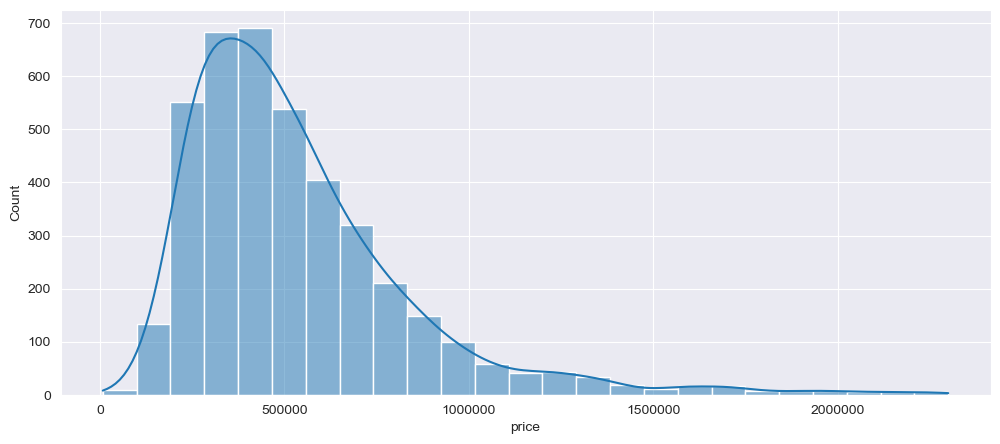

In [4]:
# distribution of house prices was right-skewed
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='price', bins=25, kde=True)
plt.ticklabel_format(style='plain')

In [5]:
# apply log transformation to improve performance of linear regression model
df['log_price'] = np.log(df['price'])

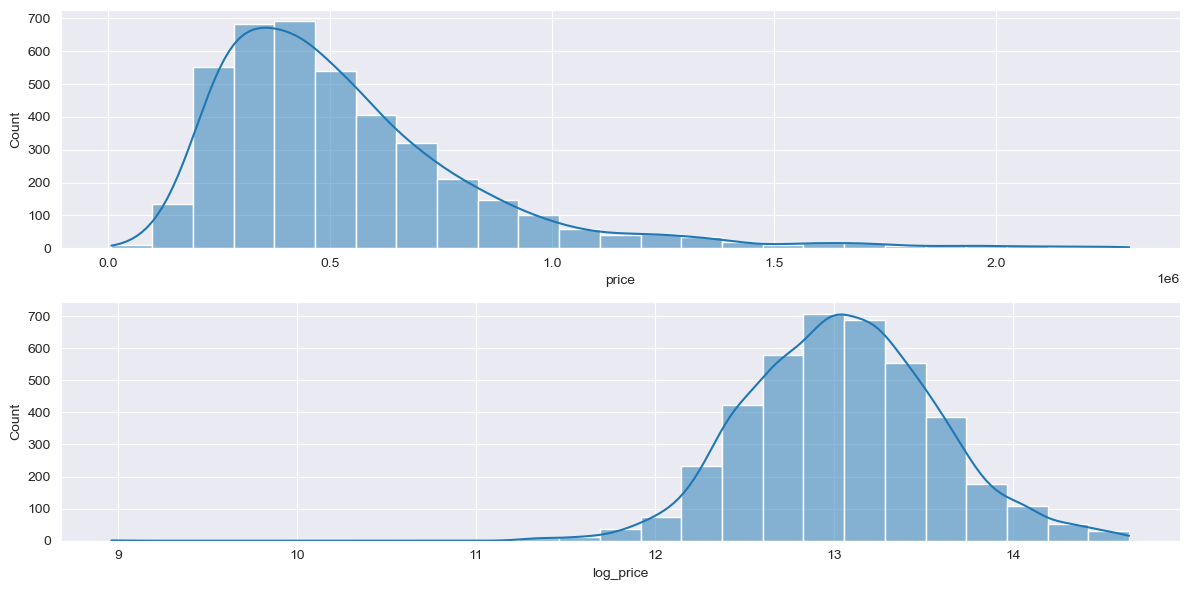

In [6]:
# distribution of price compared to log_price
fig, axes = plt.subplots(2, 1, figsize=(12,6))
sns.histplot(data=df, x='price', bins=25, kde=True, ax=axes[0])
sns.histplot(data=df, x='log_price', bins=25, kde=True, ax=axes[1])
plt.tight_layout();

### Extracting Features from Date

In [7]:
# time portion of the date not useful
df['date'].value_counts()

date
2014-06-23 0:00    140
2014-06-26 0:00    130
2014-06-25 0:00    130
2014-07-08 0:00    125
2014-07-09 0:00    119
                  ... 
2014-05-02 0:00      3
2014-05-05 0:00      3
2014-07-04 0:00      2
2014-05-11 0:00      2
2014-05-17 0:00      1
Name: count, Length: 68, dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
# convert date into numeric features and drop original date column
df['yr_sold'] = df['date'].apply(lambda x: x.year)
df['mth_sold'] = df['date'].apply(lambda x: x.month)
df['day_sold'] = df['date'].apply(lambda x: x.day)
df = df.drop('date', axis=1)

### Categorical Data

In [10]:
# country column not useful as all houses are in the US
df['country'].value_counts()

country
USA    4065
Name: count, dtype: int64

In [11]:
# street column also not useful, will instead use higher level features such as city and state
df['street'].value_counts()

street
2520 Mulberry Walk NE        4
2500 Mulberry Walk NE        3
26007 SE 27th St             2
11716 16th Ave NE            2
7075-7131 Thompson Ave SE    2
                            ..
27433-27475 211th Ct SE      1
9423 Ash Ave SE              1
8018 NE 183rd St             1
38071 39th Ave S             1
18717 SE 258th St            1
Name: count, Length: 4005, dtype: int64

In [12]:
# split statezip column into state and zipcode
df['state'] = df['statezip'].apply(lambda x: x.split()[0])
df['zipcode'] = df['statezip'].apply(lambda x: int(x.split()[1]))

In [13]:
# all houses are in the same state
df['state'].value_counts()

state
WA    4065
Name: count, dtype: int64

In [14]:
df = df.drop(['country', 'street', 'state', 'statezip'], axis=1)

In [15]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,log_price,yr_sold,mth_sold,day_sold,zipcode
0,376000.0,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle,12.837344,2014,5,9,98103
1,800000.0,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,Carnation,13.592367,2014,5,9,98014
2,2238888.0,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,Issaquah,14.621490,2014,5,9,98029
3,324000.0,3,2.25,998,904,2.0,0,0,3,798,200,2007,0,Seattle,12.688499,2014,5,9,98117
4,549900.0,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,Seattle,13.217492,2014,5,10,98146


In [16]:
# re-order columns
df.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'log_price',
       'yr_sold', 'mth_sold', 'day_sold', 'zipcode'], dtype=object)

In [17]:
df = df[['yr_sold', 'mth_sold', 'day_sold', 'price', 'log_price', 'bedrooms', 
       'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'zipcode']]

In [18]:
df.head()

,yr_sold,mth_sold,day_sold,price,log_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,zipcode
0,2014,5,9,376000.0,12.837344,3,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle,98103
1,2014,5,9,800000.0,13.592367,4,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,Carnation,98014
2,2014,5,9,2238888.0,14.621490,5,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,Issaquah,98029
3,2014,5,9,324000.0,12.688499,3,2.25,998,904,2.0,0,0,3,798,200,2007,0,Seattle,98117
4,2014,5,10,549900.0,13.217492,5,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,Seattle,98146


### Encoding city column

In [19]:
dummies = pd.get_dummies(df['city'], drop_first=True)

In [20]:
df = df.drop('city', axis=1)

In [21]:
df_final = pd.concat([df, dummies], axis=1)

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr_sold             4065 non-null   int64  
 1   mth_sold            4065 non-null   int64  
 2   day_sold            4065 non-null   int64  
 3   price               4065 non-null   float64
 4   log_price           4065 non-null   float64
 5   bedrooms            4065 non-null   int64  
 6   bathrooms           4065 non-null   float64
 7   sqft_living         4065 non-null   int64  
 8   sqft_lot            4065 non-null   int64  
 9   floors              4065 non-null   float64
 10  waterfront          4065 non-null   int64  
 11  view                4065 non-null   int64  
 12  condition           4065 non-null   int64  
 13  sqft_above          4065 non-null   int64  
 14  sqft_basement       4065 non-null   int64  
 15  yr_built            4065 non-null   int64  
 16  yr_ren

In [23]:
df_final.to_csv('USA Housing Dataset Final.csv', index=False)